### Importing Libraries

In [2]:
import pandas  as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()
import plotly.offline as pyo
import plotly.graph_objs as go
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["image.cmap"] = "viridis"

### import data and View it 

In [2]:
large_data = pd.read_csv("E:\\Work\\learning\\google capstone Project #1\\Trip Data\\TripData (CSV)\\Full Data.csv")

In [3]:
large_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [4]:
large_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629980 entries, 0 to 6629979
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 657.6+ MB


### converting columns into datetime format

In [5]:
large_data['started_at'] = pd.to_datetime(large_data['started_at'])
large_data['ended_at'] = pd.to_datetime(large_data['ended_at'])

In [6]:
large_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    916111
start_station_id      916108
end_station_name      978490
end_station_id        978490
start_lat                  0
start_lng                  0
end_lat                 6091
end_lng                 6091
member_casual              0
dtype: int64

In [7]:
#checking unique values 
print("number of unique values in rideable type and member casual : ")
print(large_data.rideable_type.unique())
print(large_data.member_casual.unique())

number of unique values in rideable type and member casual : 
['electric_bike' 'classic_bike' 'docked_bike']
['member' 'casual']


### calculating Trip Duration in Minutes 

In [10]:
large_data["Trip_Duration"] = ((large_data.ended_at - large_data.started_at).dt.total_seconds())/60

In [11]:
large_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_Duration
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member,2.716667
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member,6.283333
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member,5.983333
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member,25.833333
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member,4.133333


### converting columns hour into hour format and date into date format 

In [12]:
large_data['Starting_hour'] = pd.to_datetime(large_data['started_at']).dt.time
large_data['started_at'] = pd.to_datetime(large_data['started_at']).dt.date
large_data['Ending_hour'] = pd.to_datetime(large_data['ended_at']).dt.time
large_data['ended_at'] = pd.to_datetime(large_data['ended_at']).dt.date

### Cleaning String 

In [13]:
large_data["rideable_type"]=large_data["rideable_type"].str.replace("_"," ")

In [14]:
#sorting values by date 
large_data.sort_values(by="started_at",ascending=True,inplace=True)

### checking unique and the number of unique values 

In [15]:
print("unique values in start station name and end station name : ")
print(large_data.start_station_name.nunique()," - ",large_data.end_station_name.nunique())

unique values in start station name and end station name : 
1294  -  1316


In [16]:
large_data.start_station_name.unique , large_data.end_station_name.unique

(<bound method Series.unique of 377557     Greenview Ave & Fullerton Ave
 204294       Halsted St & Wrightwood Ave
 579078        Larrabee St & Kingsbury St
 480600           MLK Jr Dr & Pershing Rd
 35816             Benson Ave & Church St
                        ...              
 6553740            Wood St & Chicago Ave
 6553739                              NaN
 6272745        Leavitt St & Armitage Ave
 6173733       Albany Ave & 111th St - NW
 5945566          Knox Ave & Montrose Ave
 Name: start_station_name, Length: 6629980, dtype: object>,
 <bound method Series.unique of 377557                                         NaN
 204294                  Lincoln Ave & Waveland Ave
 579078                      Clark St & Randolph St
 480600                           Wells St & Elm St
 35816                    Eastlake Ter & Rogers Ave
                             ...                   
 6553740                     Clark St & Schiller St
 6553739    Wolcott (Ravenswood) Ave & Montrose Ave


In [17]:
print(large_data.start_station_id.nunique()," - ",large_data.end_station_id.nunique())

1158  -  1172


In [18]:
large_data.start_station_id.unique , large_data.end_station_id.unique

(<bound method Series.unique of 377557     TA1307000001
 204294     TA1309000061
 579078     TA1306000009
 480600            13420
 35816               596
                ...     
 6553740             637
 6553739             NaN
 6272745    TA1309000029
 6173733             678
 5945566             592
 Name: start_station_id, Length: 6629980, dtype: object>,
 <bound method Series.unique of 377557              NaN
 204294            13253
 579078     TA1305000030
 480600     KA1504000135
 35816               523
                ...     
 6553740    TA1309000024
 6553739    TA1307000144
 6272745           18067
 6173733             897
 5945566             592
 Name: end_station_id, Length: 6629980, dtype: object>)

#### we won't make any use out of stations id , lets fill the NA values 

### Filling Na 

In [19]:
TripData = large_data.fillna(value='No Record')

### dropping rows that has less or equal 0 duration 

In [21]:
columnsDropped = TripData.loc[TripData["Trip_Duration"] <= 0]

In [22]:
TripData.drop(columnsDropped.index,inplace=True,axis=0)

In [23]:
TripData.shape

(6629268, 16)

In [24]:
TripData.ride_id.nunique()

6629268

#### TripData rows = TripData.ride_id number of unique values , that means there is no duplicates

In [26]:
TripData.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
Trip_Duration         0
Starting_hour         0
Ending_hour           0
dtype: int64

In [28]:
TripData.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat                object
end_lng                object
member_casual          object
Trip_Duration         float64
Starting_hour          object
Ending_hour            object
dtype: object

### Calculating Trip Distance using Haversine Methode

#### dropping coordinates with "No Record" Value

In [29]:
TripData.drop(TripData.loc[(TripData["end_lat"]=="No Record")|(TripData["end_lng"]=="No Record")].index,inplace=True)

#### converting coordinates into float value

In [30]:
TripData["end_lat"] = TripData["end_lat"].astype("float")
TripData["end_lng"] = TripData["end_lng"].astype("float")

#### Haversine Method

In [31]:
def haversine_np(lat1, lng1, lat2, lng2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lat1, lng1, lat2, lng2])

    dlat = lat2 - lat1
    dlng = lng2 - lng1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlng/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [32]:
TripData["Distance"] = haversine_np(TripData["start_lat"],TripData["start_lng"],TripData["end_lat"],TripData["end_lng"])
TripData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_Duration,Starting_hour,Ending_hour,Distance
377557,60EE91EE2D3D6F26,electric bike,2021-06-01,2021-06-01,Greenview Ave & Fullerton Ave,TA1307000001,No Record,No Record,41.925423,-87.665885,41.910000,-87.680000,member,12.200000,16:27:51,16:40:03,3.971895
204294,F09BF0351B2AAFE5,classic bike,2021-06-01,2021-06-01,Halsted St & Wrightwood Ave,TA1309000061,Lincoln Ave & Waveland Ave,13253,41.929143,-87.649077,41.948797,-87.675278,member,13.333333,18:50:02,19:03:22,7.401336
579078,1B5DA6EC98ED5B08,electric bike,2021-06-01,2021-06-01,Larrabee St & Kingsbury St,TA1306000009,Clark St & Randolph St,TA1305000030,41.897753,-87.643269,41.884517,-87.630977,casual,11.466667,18:34:47,18:46:15,3.503940
480600,5FE6945294946D83,electric bike,2021-06-01,2021-06-01,MLK Jr Dr & Pershing Rd,13420,Wells St & Elm St,KA1504000135,41.824522,-87.616767,41.902745,-87.634318,member,38.416667,15:49:15,16:27:40,5.023578
35816,6AC13514BBCF7601,classic bike,2021-06-01,2021-06-01,Benson Ave & Church St,596,Eastlake Ter & Rogers Ave,523,42.048214,-87.683485,42.020887,-87.665058,member,25.083333,16:31:50,16:56:55,5.182693


### Dropping rows that has distance value equal or less then 0 

In [33]:
TripData.drop(TripData.loc[TripData["Distance"]<=0].index,inplace=True)

In [34]:
TripData.shape

(6107260, 17)

### Creating a  Month and a day column 

#### Month 

In [35]:
TripData["month"] = pd.to_datetime(TripData["started_at"]).dt.month

#### Day of the week

In [37]:
TripData["day"] = pd.to_datetime(TripData["started_at"]).dt.weekday

In [39]:
TripData["day"].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [40]:
TripData.replace({"day":{0:"Monday",1:"Thuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}},inplace=True)
TripData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_Duration,Starting_hour,Ending_hour,Distance,month,day
377557,60EE91EE2D3D6F26,electric bike,2021-06-01,2021-06-01,Greenview Ave & Fullerton Ave,TA1307000001,No Record,No Record,41.925423,-87.665885,41.910000,-87.680000,member,12.200000,16:27:51,16:40:03,3.971895,6,Thuesday
204294,F09BF0351B2AAFE5,classic bike,2021-06-01,2021-06-01,Halsted St & Wrightwood Ave,TA1309000061,Lincoln Ave & Waveland Ave,13253,41.929143,-87.649077,41.948797,-87.675278,member,13.333333,18:50:02,19:03:22,7.401336,6,Thuesday
579078,1B5DA6EC98ED5B08,electric bike,2021-06-01,2021-06-01,Larrabee St & Kingsbury St,TA1306000009,Clark St & Randolph St,TA1305000030,41.897753,-87.643269,41.884517,-87.630977,casual,11.466667,18:34:47,18:46:15,3.503940,6,Thuesday
480600,5FE6945294946D83,electric bike,2021-06-01,2021-06-01,MLK Jr Dr & Pershing Rd,13420,Wells St & Elm St,KA1504000135,41.824522,-87.616767,41.902745,-87.634318,member,38.416667,15:49:15,16:27:40,5.023578,6,Thuesday
35816,6AC13514BBCF7601,classic bike,2021-06-01,2021-06-01,Benson Ave & Church St,596,Eastlake Ter & Rogers Ave,523,42.048214,-87.683485,42.020887,-87.665058,member,25.083333,16:31:50,16:56:55,5.182693,6,Thuesday


### Analyze Step 

#### Number of rides for each membership type (casual , member) 

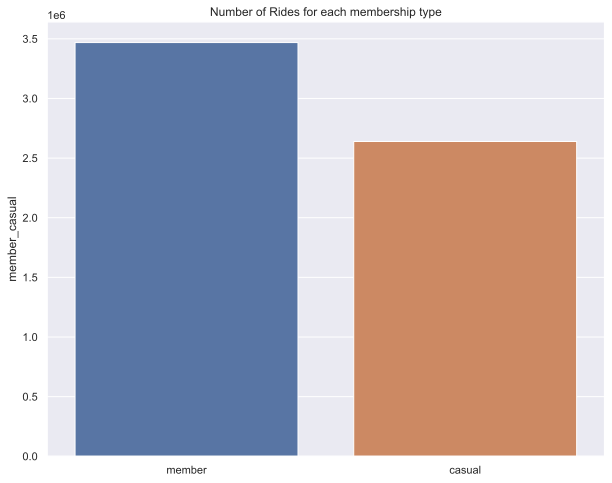

In [41]:
sns.barplot(x=TripData["member_casual"].unique(),y=TripData["member_casual"].value_counts())
plt.title("Number of Rides for each membership type")
plt.show()

####  N of Rides for each Membership each year

In [42]:
TripData["year"] =  pd.DatetimeIndex(TripData["started_at"]).year

In [44]:
TripData.groupby("year")["member_casual"].value_counts()

year  member_casual
2021  member           2183904
      casual           1825789
2022  member           1284492
      casual            813075
Name: member_casual, dtype: int64

#### Total number of rides each month and  day (bar chart)

In [45]:
member_data = TripData[TripData["member_casual"]=="member"]
casual_data = TripData[TripData["member_casual"]=="casual"]

<Figure size 1440x1440 with 0 Axes>

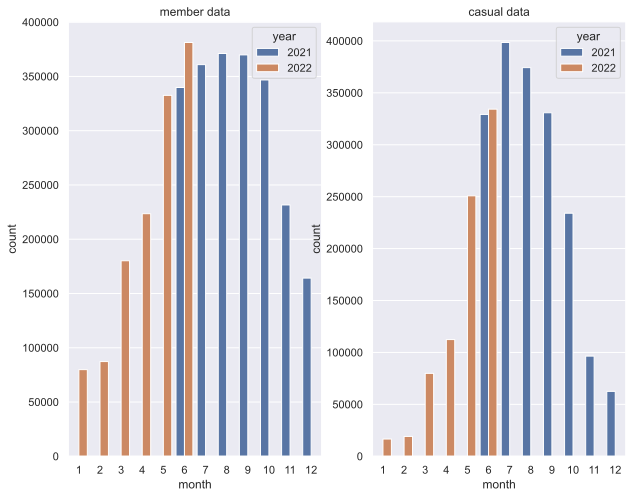

<Figure size 1440x1440 with 0 Axes>

In [46]:

plt.subplot(1,2,1)
sns.countplot(x="month",data=member_data,hue="year")
plt.title("member data")
plt.subplot(1,2,2)
sns.countplot(x="month",data=casual_data,hue="year")
plt.title("casual data")
plt.figure(figsize=(20,20))

Text(0.5, 1.0, 'Number of Rides each day')

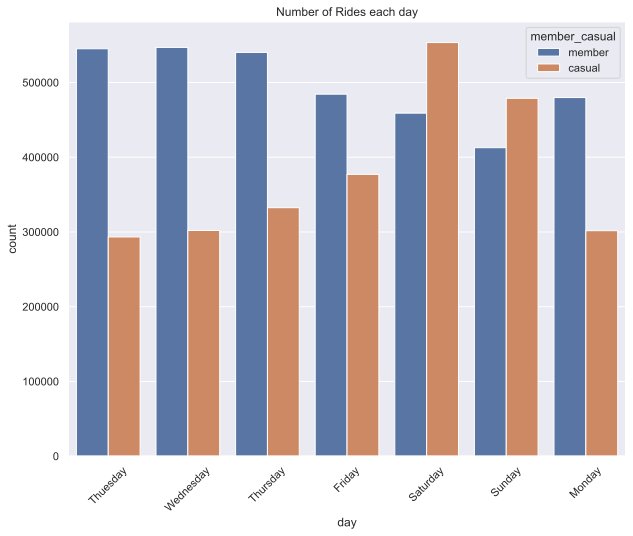

In [47]:
sns.countplot(x="day",data=TripData,hue="member_casual")
plt.xticks(rotation=45)
plt.title("Number of Rides each day")

In [48]:
average_casual_trips = casual_data.groupby(['year','month']).agg(
    average_trip_duration = ('Trip_Duration', 'mean')
)
average_casual_trips = average_casual_trips.reset_index()
average_casual_trips.sort_values(by='average_trip_duration',ascending=False)
display(average_casual_trips)

,year,month,average_trip_duration
0,2021,6,34.073716
1,2021,7,30.167056
2,2021,8,26.026720
3,2021,9,25.579909
4,2021,10,23.484526
5,2021,11,19.550903
6,2021,12,20.976737
7,2022,1,23.365498
8,2022,2,21.009617
9,2022,3,24.850329


In [49]:
average_member_trips = member_data.groupby(['year','month']).agg(
    average_trip_duration = ('Trip_Duration', 'mean')
)
average_member_trips = average_member_trips.reset_index()
average_member_trips.sort_values(by='average_trip_duration',ascending=False)
display(average_member_trips)

,year,month,average_trip_duration
0,2021,6,14.340638
1,2021,7,14.032409
2,2021,8,13.802973
3,2021,9,13.486239
4,2021,10,12.376825
5,2021,11,11.289918
6,2021,12,10.961715
7,2022,1,11.718937
8,2022,2,11.205659
9,2022,3,11.926094


In [50]:
average_member_trips.dtypes

year                       int64
month                      int64
average_trip_duration    float64
dtype: object

In [1]:
M_average_DayDuration = pd.pivot_table(member_data,values='Trip_Duration',index='day',aggfunc='mean')
M_average_DayDuration = M_average_DayDuration.reset_index()
M_average_DayDuration.sort_values(by='Trip_Duration',ascending=False, inplace=True)
C_average_DayDuration = pd.pivot_table(casual_data,values='Trip_Duration',index='day',aggfunc='mean')
C_average_DayDuration = C_average_DayDuration.reset_index()
C_average_DayDuration.sort_values(by='Trip_Duration',ascending=False, inplace=True)

NameError: name 'pd' is not defined

In [53]:
M_average_DayDuration

,day,Trip_Duration
3,Sunday,14.654199
2,Saturday,14.529166
0,Friday,12.775429
1,Monday,12.491648
5,Thursday,12.417531
6,Wednesday,12.307550
4,Thuesday,12.216504


In [54]:
C_average_DayDuration

,day,Trip_Duration
3,Sunday,14.654199
2,Saturday,14.529166
0,Friday,12.775429
1,Monday,12.491648
5,Thursday,12.417531
6,Wednesday,12.307550
4,Thuesday,12.216504


#### Most used rideable type for both casual and member (pie chart)

In [55]:
rideable_casual  = casual_data["rideable_type"].value_counts().rename_axis('unique_values').reset_index(name='counts')
rideable_member  = member_data["rideable_type"].value_counts().rename_axis('unique_values').reset_index(name='counts')
rideable_member

,unique_values,counts
0,classic bike,2122732
1,electric bike,1345664


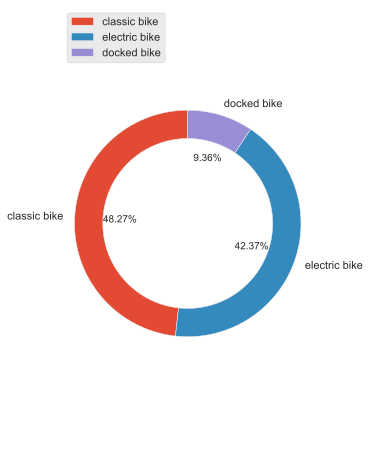

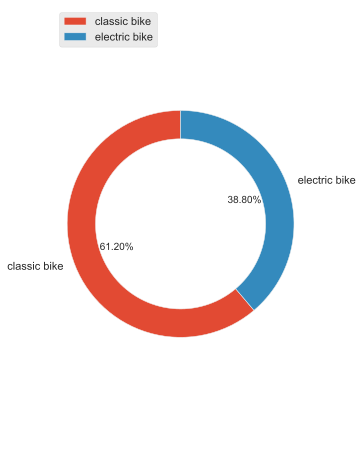

<Figure size 360x360 with 0 Axes>

In [56]:
plt.style.use('ggplot')
plt.title('Share of Companies')
plt.subplot(1,2,1)
plt.pie(x=rideable_casual.counts, labels=rideable_casual.unique_values, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
# donut
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()
plt.subplot(1,2,2)
plt.pie(x=rideable_member.counts, labels=rideable_member.unique_values, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
# donut
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)
plt.figure(figsize=(5,5))
plt.show()



#### trip duration in each rideable type for both casual and member (scatter plot)

In [57]:
rideable_duration_member = member_data.groupby(['rideable_type']).agg(
    average_trip_duration = ('Trip_Duration', 'mean')
)
rideable_duration_member = rideable_duration_member.reset_index()
rideable_duration_member.sort_values(by='average_trip_duration',ascending=False)
display(rideable_duration_member)

,rideable_type,average_trip_duration
0,classic bike,13.303678
1,electric bike,12.455188


In [58]:
rideable_duration_casual = casual_data.groupby(['rideable_type']).agg(
    average_trip_duration = ('Trip_Duration', 'mean')
)
rideable_duration_casual = rideable_duration_casual.reset_index()
rideable_duration_casual.sort_values(by='average_trip_duration',ascending=False,inplace=True)
display(rideable_duration_casual)

,rideable_type,average_trip_duration
1,docked bike,68.505908
0,classic bike,24.189025
2,electric bike,19.105428


In [59]:
TripData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Trip_Duration,Starting_hour,Ending_hour,Distance,month,day,year
377557,60EE91EE2D3D6F26,electric bike,2021-06-01,2021-06-01,Greenview Ave & Fullerton Ave,TA1307000001,No Record,No Record,41.925423,-87.665885,41.910000,-87.680000,member,12.200000,16:27:51,16:40:03,3.971895,6,Thuesday,2021
204294,F09BF0351B2AAFE5,classic bike,2021-06-01,2021-06-01,Halsted St & Wrightwood Ave,TA1309000061,Lincoln Ave & Waveland Ave,13253,41.929143,-87.649077,41.948797,-87.675278,member,13.333333,18:50:02,19:03:22,7.401336,6,Thuesday,2021
579078,1B5DA6EC98ED5B08,electric bike,2021-06-01,2021-06-01,Larrabee St & Kingsbury St,TA1306000009,Clark St & Randolph St,TA1305000030,41.897753,-87.643269,41.884517,-87.630977,casual,11.466667,18:34:47,18:46:15,3.503940,6,Thuesday,2021
480600,5FE6945294946D83,electric bike,2021-06-01,2021-06-01,MLK Jr Dr & Pershing Rd,13420,Wells St & Elm St,KA1504000135,41.824522,-87.616767,41.902745,-87.634318,member,38.416667,15:49:15,16:27:40,5.023578,6,Thuesday,2021
35816,6AC13514BBCF7601,classic bike,2021-06-01,2021-06-01,Benson Ave & Church St,596,Eastlake Ter & Rogers Ave,523,42.048214,-87.683485,42.020887,-87.665058,member,25.083333,16:31:50,16:56:55,5.182693,6,Thuesday,2021


In [60]:
TripData.to_csv("E:\\Work\\learning\\google capstone Project #1\\Trip Data\\Cleaned Data\\cleaned_data.csv",index=False)

### Tableau Visualizations  : 
https://public.tableau.com/views/GoogleBikeStudy-MembershipComparisonDashboard/Dashboard1?:language=fr-FR&:display_count=n&:origin=viz_share_link

### Insights  : 
- Casual Ride more in summer and less in the rest of seasons while member riders ride less in winter only and start to ride more towards juin  
- Casual ride in weekends while member ride more in weekdays Member prefer to ride in the morning 7~8 and 15~17PM  while casual ride only from 15~17PM  
- Casual Segment uses classic and electrical bikes evenly while Member segment use classic more because its more economic and doesn't need any fuel Member riders use bikes for short trips unlike the casuals that use them for long ones  
- Member riders tend to speed during weekdays while covering small distances which tells that they use bikes for a purpose (work-study . . .) while casual riders speed during weekends only  

### Recommendations : 
- to use them for a purpose (work , study ) , benefit from cyclistic's bike services , cyclistic offer more then 600 docked , stations for those casual with docked bikes , cyclistic provides assistive service for people with disabilities    
- hold the campaigns to specific times where casual rides increase (summer , evening , top places , weekends) , use targeted ads on social media for specific places and use the member insights to attract casual riders into buying annual   
- decrease prices going into less rided seasons such as winter and focusing marketing towards summer,introduce weekends, promotions or free use in weekends to attract casual riders   

Github Files (including Slider Presentation , Sample Data and Documentation) : 
https://github.com/AbdelM1djid/Google-Data-Analysis-Capstone-Project

email : madjidmain@gmail.com
Linkedin : www.linkedin.com/in/madjid-erroukrma-680654221
